# Exercise 2: Introduction to NetworkX

**FOR SECOND EXERCISE (25th/26th FEBRUARY)**

In this exercise we are going to work with the NetworkX package, which is a very popular python package to work with graphs. Make sure you have this package installed, and have the documentation of the package ready:
https://networkx.github.io/documentation/stable/index.html

In [17]:
import networkx as nx

### Example 1: Creating and Growing a Graph

__a)__ Creation of an empty graph

In [ ]:
# undirected network
G = nx.Graph()
# directed network
G1 = nx.DiGraph()

__b)__ Adding Nodes

In [ ]:
# add a single node
G.add_node(1)
print(G.nodes())

[1]


In [ ]:
# add nodes from list
G.add_nodes_from([2, 3])
G1.add_nodes_from([2, 3])

print(G.nodes())
print(G1.nodes())

[1, 2, 3]
[2, 3]


In [ ]:
# add nodes from other graphs
H = nx.path_graph(10)
print(H.nodes())

G.add_nodes_from(H)
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]


__c)__ Adding Edges

In [ ]:
# add edges one at a time
G.add_edge(1, 2)
G.add_edge(2, 1)

G1.add_edge(1, 2)
G1.add_edge(2, 1)

print(G.edges())
print(G1.edges())

[(1, 2)]
[(2, 1), (1, 2)]


In [ ]:
# add multiple edges from list
G.add_edges_from([(2, 5), (4, 6)])
print(G.edges())

[(1, 2), (2, 5), (4, 6)]


In [ ]:
# add edges from other graphs
print(H.edges())

G.add_edges_from(H.edges)
print(G.edges())

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(1, 2), (1, 0), (2, 5), (2, 3), (3, 4), (4, 6), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


### Example 2: Analyzing Graphs

__a)__ Connected Components

In [ ]:
# build a second connected component
G.add_edges_from([(10,11),(11,12),(10,12)])

list(nx.connected_components(G))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12}]

__b)__ Accessing Degrees

In [ ]:
# degree of all nodes
print(G.degree())

# degree of a certain node
print(G.degree(3))

[(1, 2), (2, 3), (3, 2), (0, 1), (4, 3), (5, 3), (6, 3), (7, 2), (8, 2), (9, 1), (10, 2), (11, 2), (12, 2)]
2


### Example 3: Drawing a Graph

In [ ]:
import matplotlib.pyplot as plt

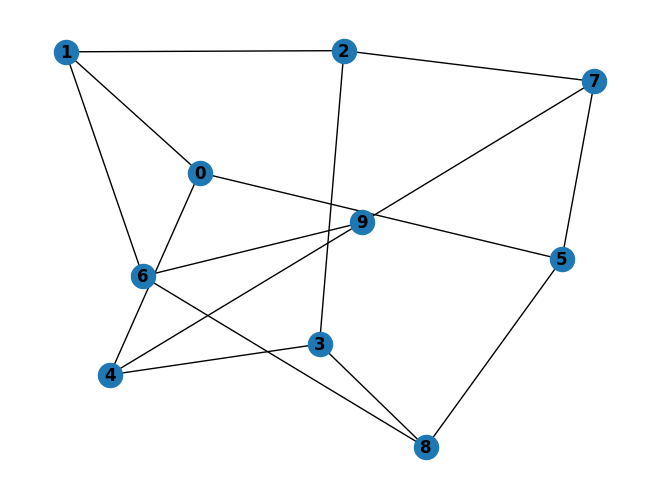

In [ ]:
G = nx.petersen_graph()

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

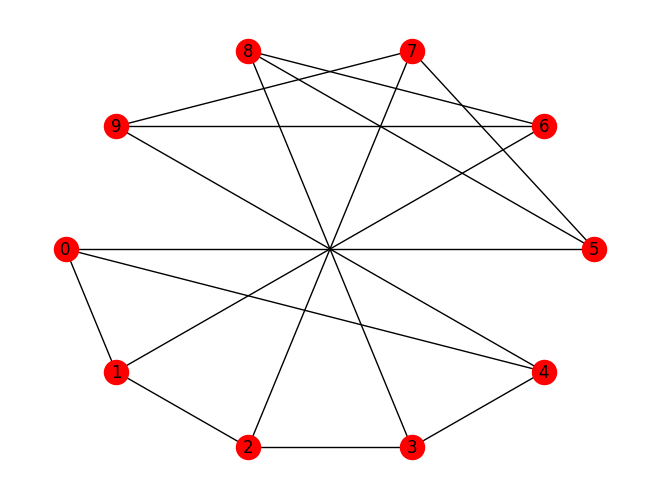

In [ ]:
# different layout
nx.draw_shell(G, node_color='red', with_labels=True)

### Task 0: Load a network file

In the following tasks we are going to investigate a network of jazz musicians, where each node represents a musician, and a connection is drawn if they have colaborated.

Refresh your notebook, and execute the cell below to load the jazz musician network.

In [18]:
G = nx.read_edgelist('jazz.txt',nodetype=int)

Note that in all the following tasks, you should try to use functions from the networkX package wherever possible.

### Task 1: Basic statistics

__a)__ Print the number of nodes in G!

In [ ]:
G.number_of_nodes()

198

__b)__ Print the number of edges in G!

In [ ]:
G.number_of_edges()

2742

__c)__ Give the density of the network!

In [ ]:
nx.density(G)

0.14059375480695277

__d)__ Get the node ID and the degree of the node with the highest degree in the network!

In [ ]:
max(G.degree(), key = lambda x:x[1])

(135, 100)

### Task 2: Further Statistics

__a)__	 How many connected components does the network consist of?

In [ ]:
len(list(nx.connected_components(G)))

1

__b)__ What is the diameter of the network?

In [ ]:
nx.diameter(G)

6

__c)__ Compute the average distance between nodes!


In [ ]:
nx.average_shortest_path_length(G)

2.2350407629595446

__d)__	What is the shortest path from node 1 to node 10: Give the length and the node IDs it traverses!

In [ ]:
path = nx.shortest_path(G,source = 1, target = 10)

In [ ]:
nx.shortest_path_length(G,source = 1, target = 10)

3

### Task 3: Plotting the Graph

__a)__ Plot the network using a spring layout. For your own enjoyment: try to plot the network with different layouts.

In [ ]:
import matplotlib.pyplot as plt

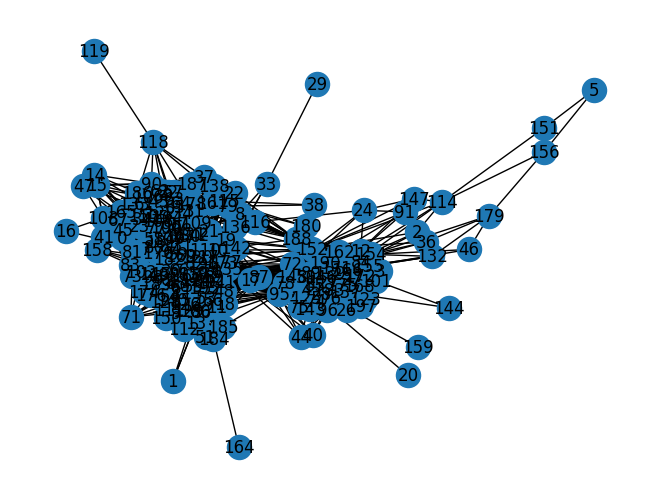

In [ ]:
nx.draw(G, with_labels=True)
plt.show()

__b)__ Plot the nodes and edges of the shortest path in 2d) in green color!

In [ ]:
colors = ['green' if n in path else 'lightblue' for n in G.nodes()]

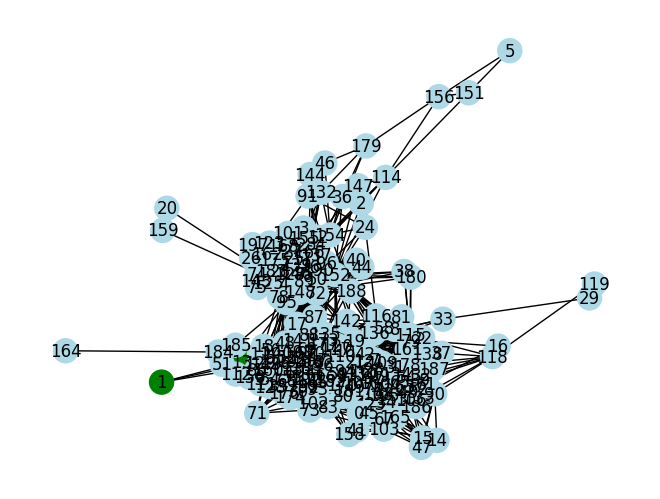

In [ ]:
nx.draw(G, node_color = colors, with_labels=True)
plt.show()

### Task 4: Embedded Edges

Compute the *embeddedness* of each edge, which is the number of neighbors that its constituent nodes have in common.

For example: The friendship edge of A and B has an embeddedness of 2 if A and B have two friends in common.

Remove all edges with an embeddedness less than or equal to 2 and plot the resulting network.

In [30]:
embeddedness = {}
for u, v in G.edges():
  commen_nodes = set(G.neighbors(u)) & set(G.neighbors(v))
  num = len(commen_nodes)
  if num > 2:
    embeddedness[(min(u, v), max(u, v))] = num

print(embeddedness)

{(0, 7): 13, (0, 23): 16, (0, 34): 19, (0, 41): 5, (0, 45): 18, (0, 59): 17, (0, 73): 9, (0, 77): 13, (0, 80): 12, (0, 94): 15, (0, 97): 15, (0, 98): 17, (0, 99): 17, (0, 100): 15, (0, 102): 9, (0, 103): 13, (0, 107): 18, (0, 130): 15, (0, 131): 16, (0, 153): 19, (0, 158): 3, (0, 167): 19, (0, 170): 19, (7, 34): 14, (7, 45): 13, (7, 59): 20, (7, 88): 9, (7, 94): 18, (7, 97): 16, (7, 98): 18, (7, 99): 16, (7, 100): 16, (7, 109): 14, (7, 117): 9, (7, 120): 9, (7, 130): 16, (7, 131): 20, (7, 135): 16, (7, 141): 10, (7, 153): 14, (7, 167): 18, (7, 170): 18, (7, 173): 15, (14, 23): 7, (15, 23): 8, (19, 23): 5, (23, 34): 16, (23, 41): 6, (23, 42): 10, (23, 45): 12, (23, 47): 7, (23, 59): 19, (23, 73): 9, (23, 77): 20, (23, 79): 5, (23, 80): 17, (23, 90): 10, (23, 98): 18, (23, 99): 18, (23, 102): 9, (23, 103): 18, (23, 104): 19, (23, 106): 14, (23, 107): 20, (23, 131): 17, (23, 135): 15, (23, 153): 16, (23, 167): 20, (23, 170): 16, (23, 173): 12, (23, 181): 11, (31, 34): 28, (32, 34): 28, (3

In [32]:
H = G.edge_subgraph(embeddedness.keys()).copy()

print(len(H.edges()))


2696


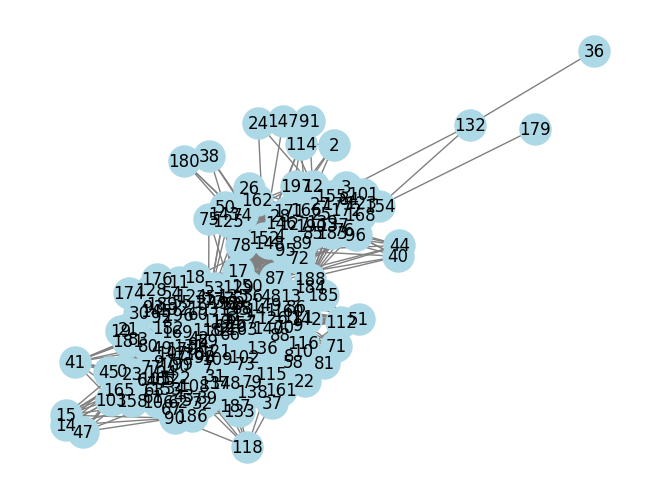

In [34]:
nx.draw(H, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
plt.show()